<a href="https://colab.research.google.com/github/swarnava-96/Time-Series/blob/main/Time_Series_with_XgBoost_vs_Fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis and Forecasting using XgBoost Regressor**

In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd
from xgboost import plot_importance, plot_tree
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"]
plt.style.use("tableau-colorblind10")

In [2]:
# Loading the dataset
df = pd.read_csv("raw_sales.csv")
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [3]:
# Lets see the shape of the dataset
df.shape

(29580, 5)

In [4]:
# Lets see the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [5]:
# Lets check for null values
df.isnull().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [6]:
# Feature Extraction
df["datesold"] = pd.to_datetime(df["datesold"])
df["hour"] = df["datesold"].dt.hour
df["dayofweek"] = df["datesold"].dt.dayofweek
df["quarter"] = df["datesold"].dt.quarter
df["month"] = df["datesold"].dt.month
df["year"] = df["datesold"].dt.year
df["dayofyear"] = df["datesold"].dt.dayofyear
df["sin_day"] = np.sin(df["dayofyear"])
df["cos_day"] = np.cos(df["dayofyear"])
df["dayofmonth"] = df["datesold"].dt.day
df["weekofyear"] = df["datesold"].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


In [7]:
# Lets see the data
df.head()

,datesold,postcode,price,propertyType,bedrooms,hour,dayofweek,quarter,month,year,dayofyear,sin_day,cos_day,dayofmonth,weekofyear
0,2007-02-07,2607,525000,house,4,0,2,1,2,2007,38,0.296369,0.955074,7,6
1,2007-02-27,2906,290000,house,3,0,1,1,2,2007,58,0.992873,0.119180,27,9
2,2007-03-07,2905,328000,house,3,0,2,1,3,2007,66,-0.026551,-0.999647,7,10
3,2007-03-09,2905,380000,house,4,0,4,1,3,2007,68,-0.897928,0.440143,9,10
4,2007-03-21,2906,310000,house,3,0,2,1,3,2007,80,-0.993889,-0.110387,21,12


In [8]:
# Lets drop the unwanted features
df = df.drop(['datesold','postcode','propertyType','bedrooms'], axis = 1)

In [9]:
# Lets see the data
df.head()

,price,hour,dayofweek,quarter,month,year,dayofyear,sin_day,cos_day,dayofmonth,weekofyear
0,525000,0,2,1,2,2007,38,0.296369,0.955074,7,6
1,290000,0,1,1,2,2007,58,0.992873,0.119180,27,9
2,328000,0,2,1,3,2007,66,-0.026551,-0.999647,7,10
3,380000,0,4,1,3,2007,68,-0.897928,0.440143,9,10
4,310000,0,2,1,3,2007,80,-0.993889,-0.110387,21,12


In [10]:
# Lets see the unique values in the feature "year"
df["year"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

Lets take the data till 2016 as training data and the rest as test data.

In [11]:
# Train and test data
df_train = df[df["year"] < 2017]
df_test = df[df["year"] >= 2017]

In [12]:
# Train test split
X_train = df_train.drop(["price"], axis = 1)
y_train = df_train["price"]
X_test = df_test.drop(["price"], axis = 1)
y_test = df_test["price"]

In [14]:
# Lets see the shapes of the train and test data
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(19796, 10) (9784, 10)
(19796,) (9784,)


In [15]:
# Model Training
reg = xgb.XGBRegressor(objective = "reg:squarederror", n_estimators = 1000)
reg.fit(X_train, y_train, verbose = True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [20]:
# Prediction
yhat = reg.predict(X_test)
print(yhat)

[914841.6  605741.75 628168.6  ... 549631.75 549631.75 549631.75]


In [17]:
# Model Evaluation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE: %f" %(rmse))

RMSE: 305639.725658


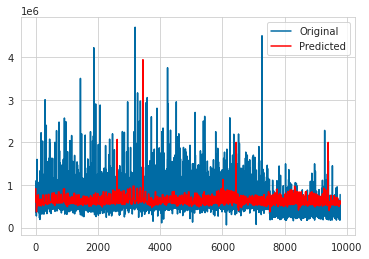

In [21]:
# Lets plot the actual vs predicted values
plt.plot(y_test.values, label = "Original")
plt.plot(yhat, label = "Predicted", color = "red")
plt.legend();

In [22]:
# Hyper parameter optimization
params = {
    'min_child_weight': [4, 5],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(6, 11)],
    'colsample_bytree': [i / 10.0 for i in range(6, 11)],
    'max_depth': [2, 3, 4]
}
# Initialize XGB and GridSearch
xgb_reg = xgb.XGBRegressor(nthread=-1, objective='reg:squarederror')
grid = GridSearchCV(xgb_reg, params)
grid.fit(X_train, y_train)
gridcv_xgb = grid.best_estimator_
print(r2_score(y_test, gridcv_xgb.predict(X_test)))

0.05376697502909311


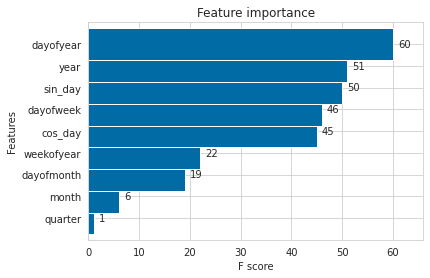

In [23]:
# Feature importance
_ = plot_importance(gridcv_xgb, height=1.5)

In [24]:
# Prediction
yhat = grid.predict(X_test)

In [25]:
# Evaluation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE : % f" %(rmse))

RMSE :  299106.485464


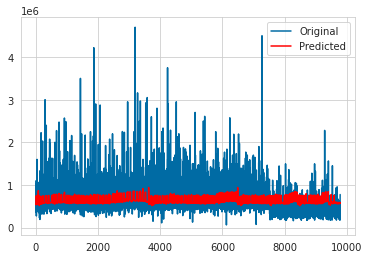

In [26]:
# Actual vs Predicted
plt.plot(y_test.values, label='Original')
plt.plot(yhat, color='red', label='Predicted')
plt.legend();

# **Time Series analysis and forecast using FBProphet**

In [27]:
# Importing the dependencies
import pandas as pd
from fbprophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [28]:
# Loading the data
df = pd.read_csv('raw_sales.csv')
# Converting object to datetime
df['datesold'] = pd.to_datetime(df['datesold'])
df.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [29]:
# Train and test data
df_train = df[:19796]
df_test = df[19796:]

In [30]:
# Lets see the shape of the dependent and dependent data
df_train.shape, df_test.shape

((19796, 5), (9784, 5))

In [31]:
# Renaming the features as per requirement of fbprophet
df_train = df_train.rename(columns={'price': 'y', 'datesold':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])
# Model Building
model = Prophet() #instantiate Prophet
model.add_regressor('postcode')
model.add_regressor('bedrooms')

In [32]:
# Model Training
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
# Renaming the test data features
df_test = df_test.rename(columns={'price': 'y', 'datesold':'ds'})
df_test.columns

Index(['ds', 'postcode', 'y', 'propertyType', 'bedrooms'], dtype='object')

In [35]:
# Feature selection
future_data=df_test[['ds', 'postcode', 'bedrooms']]
future_data.head()

,ds,postcode,bedrooms
19796,2017-10-23,2603,4
19797,2017-10-24,2615,3
19798,2017-10-24,2913,3
19799,2017-10-24,2913,3
19800,2017-10-24,2904,3


In [36]:
# Forecasting
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
9774,2019-07-25,13.245976,12.899868,13.574614
9775,2019-07-26,13.055981,12.734785,13.403187
9776,2019-07-26,13.251864,12.900511,13.577122
9777,2019-07-26,13.475760,13.148287,13.819298
9778,2019-07-26,13.530228,13.215779,13.899714
9779,2019-07-26,13.477020,13.133541,13.832848
9780,2019-07-26,13.244935,12.906142,13.579513
9781,2019-07-27,13.653966,13.293864,13.985046
9782,2019-07-27,13.836621,13.508602,14.196463
9783,2019-07-27,13.887940,13.566764,14.251935


In [37]:
# Model Evaluation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE((df_test['y']), np.exp(forecast_data['yhat'])))
print("RMSE : % f" %(rmse))

RMSE :  391136.679748


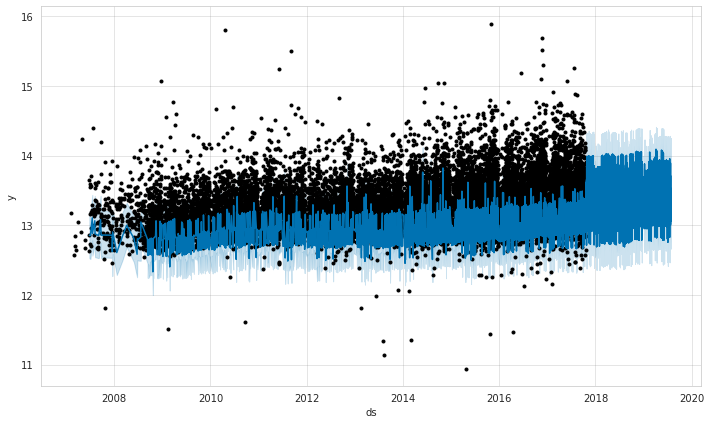

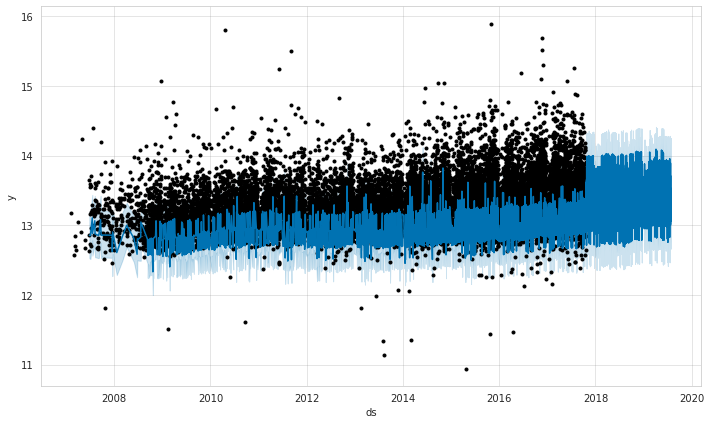

In [38]:
# Plot
model.plot(forecast_data)

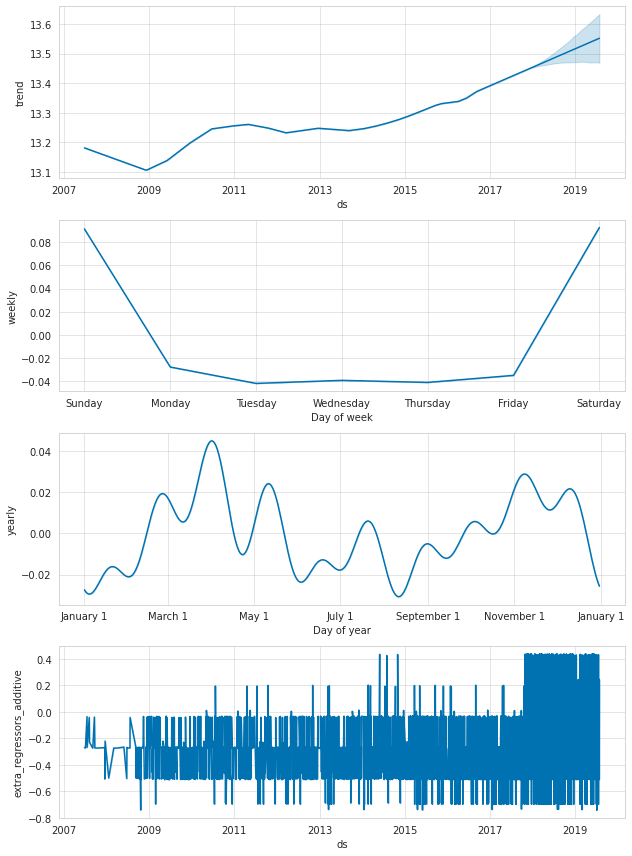

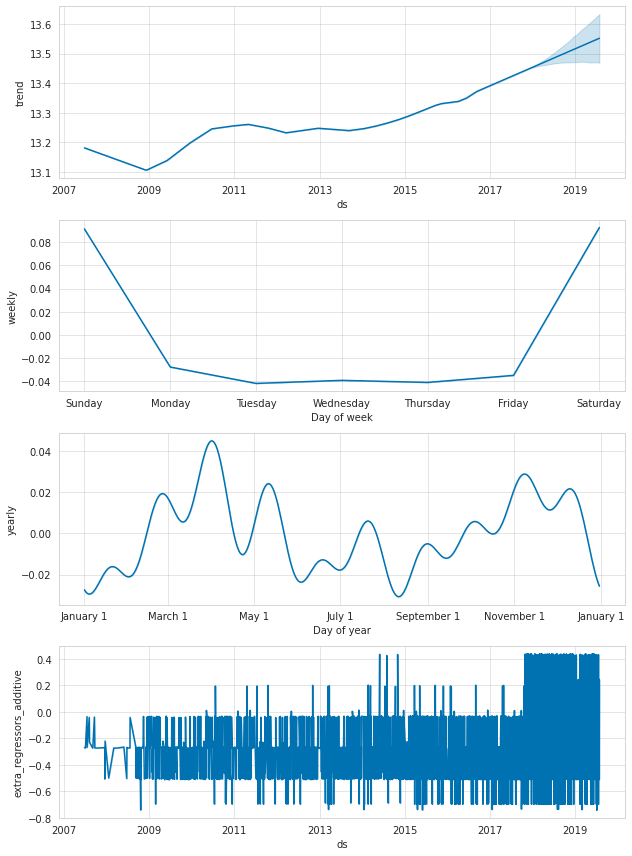

In [39]:
# Model components
model.plot_components(forecast_data)

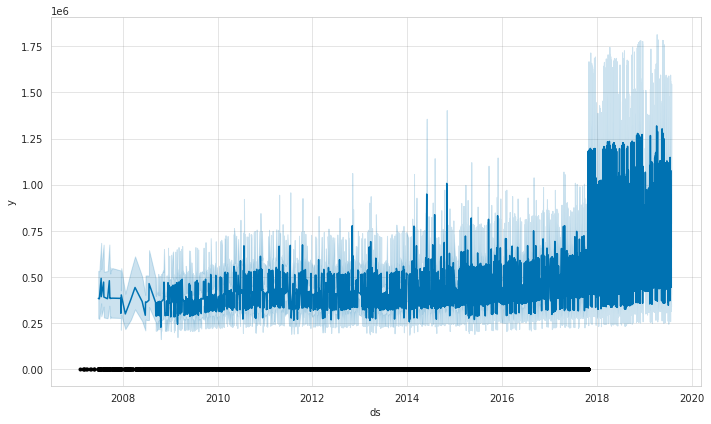

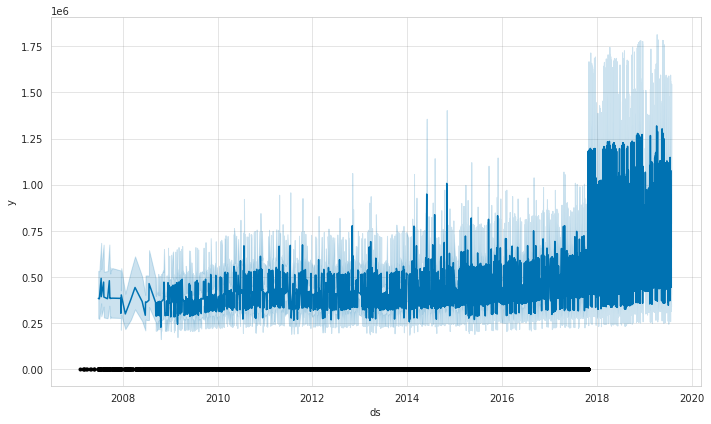

In [40]:
# Inverse Transformations
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
# Plot
model.plot(forecast_data_orig)

In [41]:
# Plotting using plotly
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_test["y"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

For this use case XgBoost performed better.